# Colorbars

Python is not always great about color bars. Here are some ways to clean it up

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline 

import sys

print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.1.1
NumPy Version: 1.17.3+intel.0
Python Version: 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Ran on 2019-12-06T15:00:06.274478


In [2]:
np.random.seed(362423)
A = np.random.uniform(size=(6,8))

## Aside: Colormaps

Matplotlib comes with lots of colormaps. See [**colormap reference**](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)

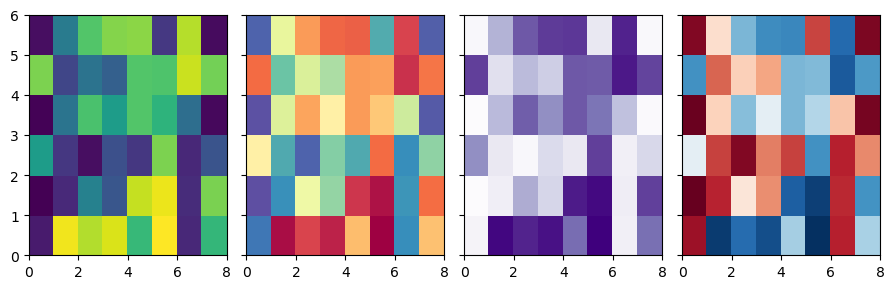

In [3]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(9,3),dpi=100,sharex=True,sharey=True)

ax1.pcolormesh(A)
ax2.pcolormesh(A,cmap=plt.cm.Spectral_r)
ax3.pcolormesh(A,cmap=plt.cm.Purples)
ax4.pcolormesh(A,cmap=plt.cm.RdBu)
fig.tight_layout()

## Standard colorbar

The size of the figure was selected to show the problem with scale

Also, since this invokes `fig`, it doesn’t play nice with subplots

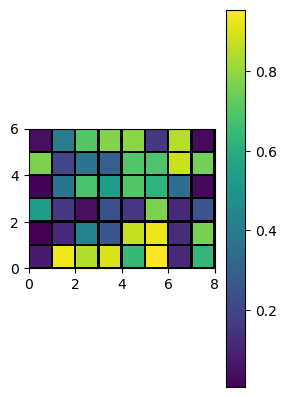

In [4]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,edgecolor='k')
ax.axis('image')
fig.colorbar(pl)

## Scaled Colorbar

This example scaled the colorbar. It also plays nicely with subplots (not demoed)

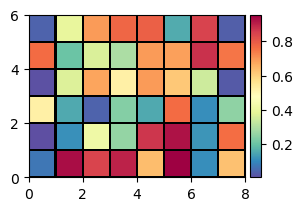

In [5]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k')
ax.axis('image')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(pl,cax=cax)

## Set Ranges

...on the plots or the colorbar

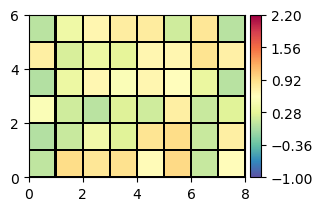

In [6]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k',vmin=-1,vmax=2.2)
ax.axis('image')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(pl,cax=cax)
cbar.set_ticks(np.linspace(-1,2.2,6))

## A helpful function

In [7]:
def pretty_colorbar(pcm_obj,fig=None,ax=None,size="5%",pad=0.05):
    """
    Create a nicer color bar on the side of the plot
    
    Inputs:
        pcm_obj : the  `ax.pcolormesh` object
        fig     :   [`plt.gcf()`] The matplotlib figure
        ax      :   [`plt.gca()`] The matplotlib axis
        size    :   ["5%"] size of the colorbar
        pad     :   [0.05] The padding
    
    Returns:
        cbar    :   fig.colorbar object
        
    Tips:
        Set the scale in the `pcolormesh` but you can set the ticks with:
            
            cbar.set_ticks(np.linspace(-1,2.2,6))
    """
    if fig is None:
        fig = plt.gcf()
    if ax is None:
        ax = plt.gca()
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size=size, pad=pad)
    cbar = fig.colorbar(pcm_obj,cax=cax)
    return cbar

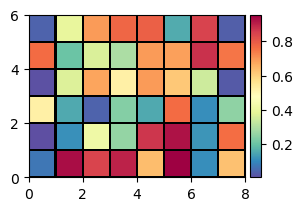

In [8]:
fig,ax = plt.subplots(1,1,figsize=(3,5),dpi=100)
pl = ax.pcolormesh(A,cmap = plt.cm.Spectral_r,edgecolor='k')
ax.axis('image')

pretty_colorbar(pl)